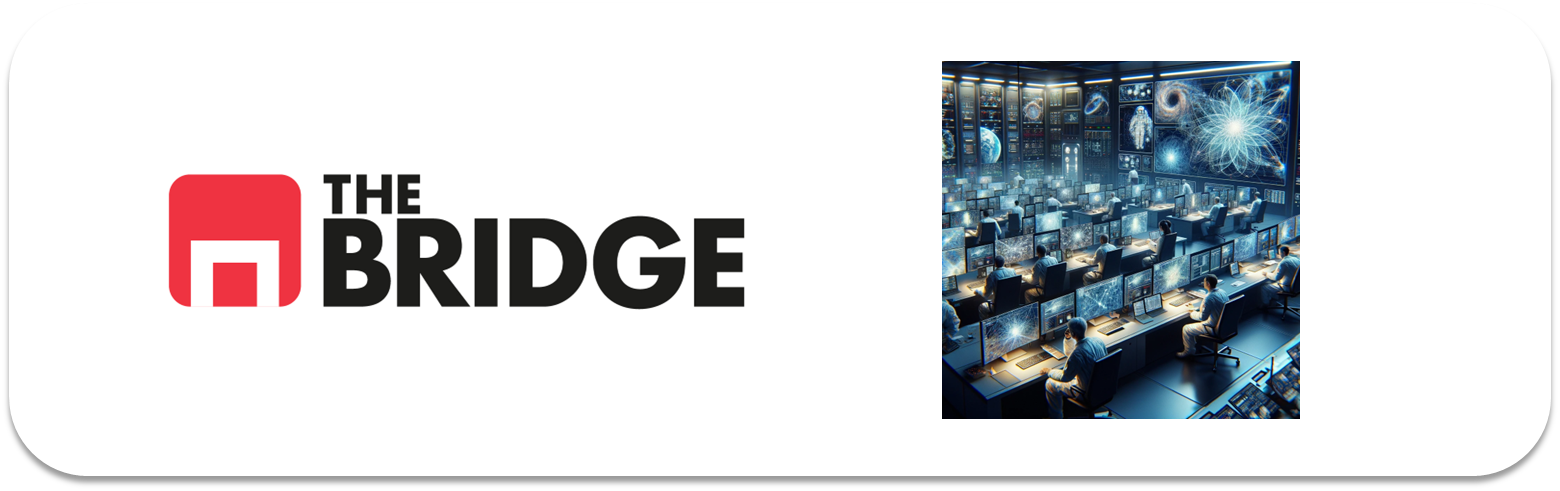

## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



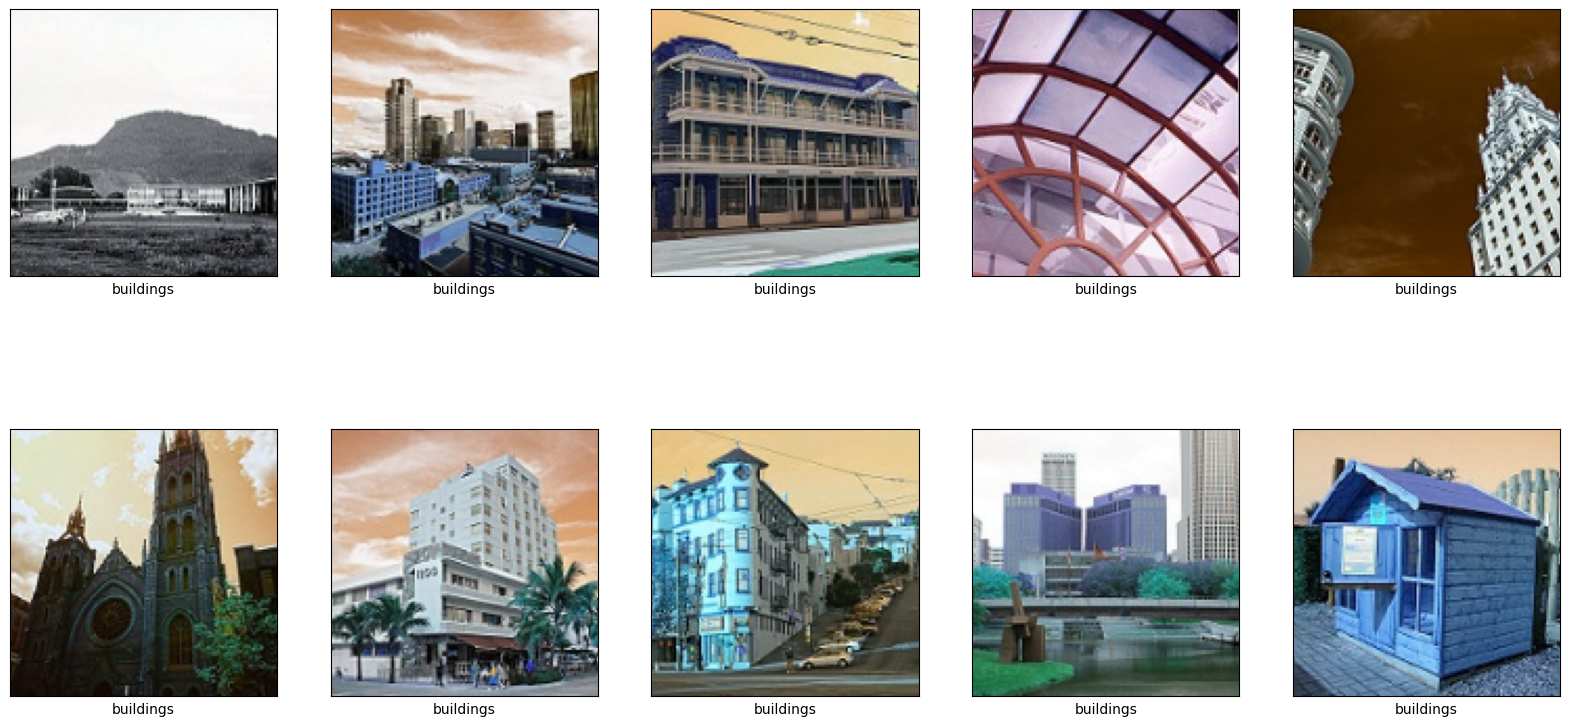

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Directorios del dataset
train_dir = './seg_train'
test_dir = './seg_test'

# Clases del dataset
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Tamaño de las imágenes
img_size = 128

def load_images_from_directory(directory, img_size):
    images = []
    labels = []
    for label, cls in enumerate(classes):
        cls_dir = os.path.join(directory, cls)
        for filename in os.listdir(cls_dir):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(cls_dir, filename)
                image = cv2.imread(img_path)
                image = cv2.resize(image, (img_size, img_size))
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

# Cargar imágenes y etiquetas
X_train, y_train = load_images_from_directory(train_dir, img_size)
X_test, y_test = load_images_from_directory(test_dir, img_size)

# Normalizar las imágenes
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding de las etiquetas
y_train = to_categorical(y_train, len(classes))
y_test = to_categorical(y_test, len(classes))

# Visualización de algunas imágenes
def visualize_images(images, labels, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(classes[np.argmax(labels[i])])
    plt.show()

visualize_images(X_train, y_train)


Transfer learning con MobileNetV2

In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Cargar el modelo base MobileNetV2 preentrenado
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Congelar las capas del modelo base
base_model.trainable = False

# Añadir una nueva cabeza
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(len(classes), activation='softmax')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=x)

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 93s 236ms/step - accuracy: 0.7815 - loss: 0.5676 - val_accuracy: 0.1311 - val_loss: 9.6470
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 80s 227ms/step - accuracy: 0.8902 - loss: 0.2953 - val_accuracy: 0.1407 - val_loss: 12.3286
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 81s 231ms/step - accuracy: 0.9030 - loss: 0.2514 - val_accuracy: 0.1404 - val_loss: 14.9986
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 81s 230ms/step - accuracy: 0.9140 - loss: 0.2254 - val_accuracy: 0.1361 - val_loss: 16.7552
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 74s 210ms/step - accuracy: 0.9199 - loss: 0.2021 - val_accuracy: 0.1354 - val_loss: 18.8845
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 81s 229ms/step - accuracy: 0.9259 - loss: 0.1917 - val_accuracy: 0.1336 - val_loss: 18.4708
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 84s 236ms/step - accuracy: 0.9240 - loss: 0.1828 - val_accuracy: 0.1361 - val_loss: 22.5237
Epoch 8/10
351/351 ━━━━━━━━━

Evaluación del modelo con transfer learning

94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.9274 - loss: 0.6495
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step


c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

   buildings       0.49      0.99      0.65       437
      forest       0.95      1.00      0.97       474
     glacier       0.82      0.82      0.82       553
    mountain       0.82      0.86      0.84       525
         sea       0.92      0.92      0.92       510
      street       0.00      0.00      0.00       501

    accuracy                           0.76      3000
   macro avg       0.67      0.76      0.70      3000
weighted avg       0.67      0.76      0.70      3000



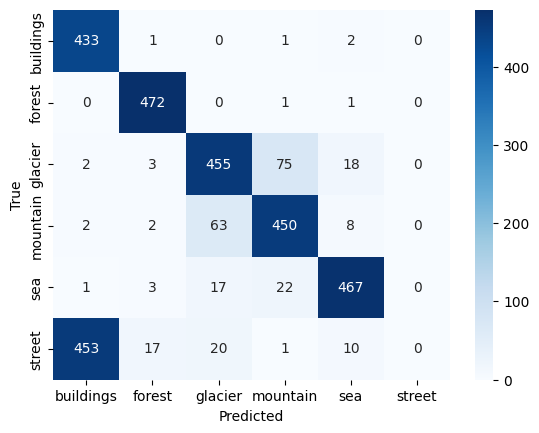

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)

# Predicciones
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Reporte de clasificación
print(classification_report(true_labels, predicted_labels, target_names=classes))

# Matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Fine-Tuning del modelo

In [4]:
# Descongelar las últimas capas del modelo base
base_model.trainable = True
fine_tune_at = 100  # Número de capas a descongelar en el modelo base

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compilar el modelo de nuevo
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con fine-tuning
history_fine = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 136s 316ms/step - accuracy: 0.7428 - loss: 1.1099 - val_accuracy: 0.1364 - val_loss: 31.8580
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 104s 295ms/step - accuracy: 0.8487 - loss: 0.4487 - val_accuracy: 0.1347 - val_loss: 33.3429
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 104s 297ms/step - accuracy: 0.8847 - loss: 0.3556 - val_accuracy: 0.1382 - val_loss: 34.8150
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 101s 288ms/step - accuracy: 0.8965 - loss: 0.2937 - val_accuracy: 0.1368 - val_loss: 34.6577
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 115s 327ms/step - accuracy: 0.9097 - loss: 0.2533 - val_accuracy: 0.1400 - val_loss: 34.7223
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 116s 330ms/step - accuracy: 0.9192 - loss: 0.2154 - val_accuracy: 0.1404 - val_loss: 34.0981
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 108s 309ms/step - accuracy: 0.9248 - loss: 0.2064 - val_accuracy: 0.1421 - val_loss: 31.9123
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 105s 301ms/step - accuracy: 0

Evaluar modelo fine-tuning

94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.9262 - loss: 0.8324
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step
              precision    recall  f1-score   support

   buildings       0.48      0.98      0.65       437
      forest       0.95      0.99      0.97       474
     glacier       0.86      0.82      0.84       553
    mountain       0.83      0.87      0.85       525
         sea       0.90      0.95      0.93       510
      street       0.00      0.00      0.00       501

    accuracy                           0.77      3000
   macro avg       0.67      0.77      0.71      3000
weighted avg       0.68      0.77      0.71      3000



c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

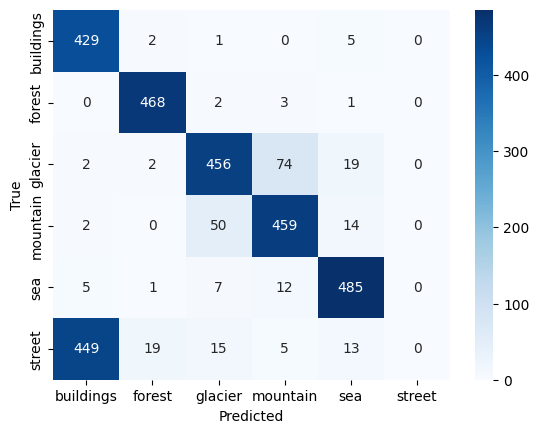

In [5]:
# Evaluación en el conjunto de prueba
test_loss_fine, test_acc_fine = model.evaluate(X_test, y_test)

# Predicciones
predictions_fine = model.predict(X_test)
predicted_labels_fine = np.argmax(predictions_fine, axis=1)
true_labels_fine = np.argmax(y_test, axis=1)

# Reporte de clasificación
print(classification_report(true_labels_fine, predicted_labels_fine, target_names=classes))

# Matriz de confusión
conf_matrix_fine = confusion_matrix(true_labels_fine, predicted_labels_fine)
sns.heatmap(conf_matrix_fine, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Evaluar y comparar modelos

In [6]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar el modelo ad-hoc (asumiendo que ya tienes el modelo ad-hoc entrenado)
test_loss_ad_hoc, test_acc_ad_hoc = model_ad_hoc.evaluate(X_test, y_test)

# Predicciones del modelo ad-hoc
predictions_ad_hoc = model_ad_hoc.predict(X_test)
predicted_labels_ad_hoc = np.argmax(predictions_ad_hoc, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Reporte de clasificación del modelo ad-hoc
report_ad_hoc = classification_report(true_labels, predicted_labels_ad_hoc, target_names=classes)
print("Reporte de Clasificación - Modelo Ad-hoc:\n", report_ad_hoc)

# Matriz de confusión del modelo ad-hoc
conf_matrix_ad_hoc = confusion_matrix(true_labels, predicted_labels_ad_hoc)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_ad_hoc, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - Modelo Ad-hoc')
plt.show()

# Evaluar el modelo de transfer learning
test_loss_transfer, test_acc_transfer = model_transfer.evaluate(X_test, y_test)

# Predicciones del modelo de transfer learning
predictions_transfer = model_transfer.predict(X_test)
predicted_labels_transfer = np.argmax(predictions_transfer, axis=1)

# Reporte de clasificación del modelo de transfer learning
report_transfer = classification_report(true_labels, predicted_labels_transfer, target_names=classes)
print("Reporte de Clasificación - Transfer Learning:\n", report_transfer)

# Matriz de confusión del modelo de transfer learning
conf_matrix_transfer = confusion_matrix(true_labels, predicted_labels_transfer)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_transfer, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - Transfer Learning')
plt.show()

# Evaluar el modelo de fine-tuning
test_loss_fine, test_acc_fine = model_fine_tuning.evaluate(X_test, y_test)

# Predicciones del modelo de fine-tuning
predictions_fine = model_fine_tuning.predict(X_test)
predicted_labels_fine = np.argmax(predictions_fine, axis=1)

# Reporte de clasificación del modelo de fine-tuning
report_fine = classification_report(true_labels, predicted_labels_fine, target_names=classes)
print("Reporte de Clasificación - Fine-Tuning:\n", report_fine)

# Matriz de confusión del modelo de fine-tuning
conf_matrix_fine = confusion_matrix(true_labels, predicted_labels_fine)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_fine, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - Fine-Tuning')
plt.show()

# Comparación de Resultados
print("\nComparación de Resultados:\n")
print(f"Modelo Ad-hoc - Precisión en Test: {test_acc_ad_hoc:.4f}")
print(f"Modelo Transfer Learning - Precisión en Test: {test_acc_transfer:.4f}")
print(f"Modelo Fine-Tuning - Precisión en Test: {test_acc_fine:.4f}")

NameError: name 'model_ad_hoc' is not defined